In [3]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import bambi as bmb

warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
az.style.use("arviz-grayscale")
from cycler import cycler
cmap = mpl.colormaps['gray']
gray_cycler = cycler(color=cmap(np.linspace(0, 0.9, 6)))
default_cycler = cycler(color=["#000000", "#6a6a6a", "#bebebe", "#2a2eec"])
plt.rc("axes", prop_cycle=default_cycler)
plt.rc("figure", dpi=300)
np.random.seed(123)

In [29]:
# Example DataFrame
data = {
    'didNotReturnNextFallIR': [1, 0, 1, 0, 0, 1, 0, 1, 0, 0,0],
    'feature1': [0.5, 1.3, 0.8, 2.1, 0.7, 1.9, 1.4, 0.6, 1.1, 1.7,1.7],
    'feature2': [3, 5, 2, 4, 1, 6, 5, 3, 2, 4, 4],
    'SchoolCode': ['A', 'A', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'B']
}
df = pd.DataFrame(data)
df

,didNotReturnNextFallIR,feature1,feature2,SchoolCode
0,1,0.5,3,A
1,0,1.3,5,A
2,1,0.8,2,B
3,0,2.1,4,B
4,0,0.7,1,A
5,1,1.9,6,B
6,0,1.4,5,A
7,1,0.6,3,B
8,0,1.1,2,A
9,0,1.7,4,B


In [30]:
model = bmb.Model('didNotReturnNextFallIR ~ feature1 + feature2', df, family='bernoulli')
# Fit the model using variational inference
fitted_model = model.fit(method='vi', draws=2000)

Modeling the probability that didNotReturnNextFallIR==1


Output()

Finished [100%]: Average Loss = 10.93


In [34]:
posterior_samples = fitted_model.sample(5000)

In [32]:
# Get summary statistics directly from the InferenceData object
posterior_summary = az.summary(posterior_samples
posterior_summary

arviz - WARNING - Shape validation failed: input_shape: (1, 5000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.737,0.766,-2.164,0.660,0.011,0.008,5004.0,5015.0,NaN
feature1,-1.952,1.355,-4.461,0.655,0.021,0.015,4325.0,4648.0,NaN
feature2,0.335,0.525,-0.662,1.300,0.008,0.005,4741.0,4905.0,NaN
p[0],0.603,0.241,0.181,0.973,0.003,0.002,4801.0,4825.0,NaN
p[1],0.432,0.218,0.068,0.816,0.003,0.002,5018.0,4911.0,NaN
p[2],0.430,0.241,0.036,0.848,0.003,0.002,4948.0,4979.0,NaN
p[3],0.157,0.167,0.000,0.485,0.003,0.002,4467.0,4478.0,NaN
p[4],0.415,0.284,0.005,0.896,0.004,0.003,4958.0,5023.0,NaN
p[5],0.314,0.266,0.001,0.817,0.004,0.003,5052.0,4830.0,NaN
p[6],0.394,0.215,0.044,0.775,0.003,0.002,5050.0,5015.0,NaN


In [36]:
predictions = model.predict(posterior_samples )
print(predictions)

None


In [28]:
fitted_model.hist

TypeError: 'numpy.ndarray' object is not callable

TypeError: `data` argument must have the group "posterior_predictive" for ppcplot

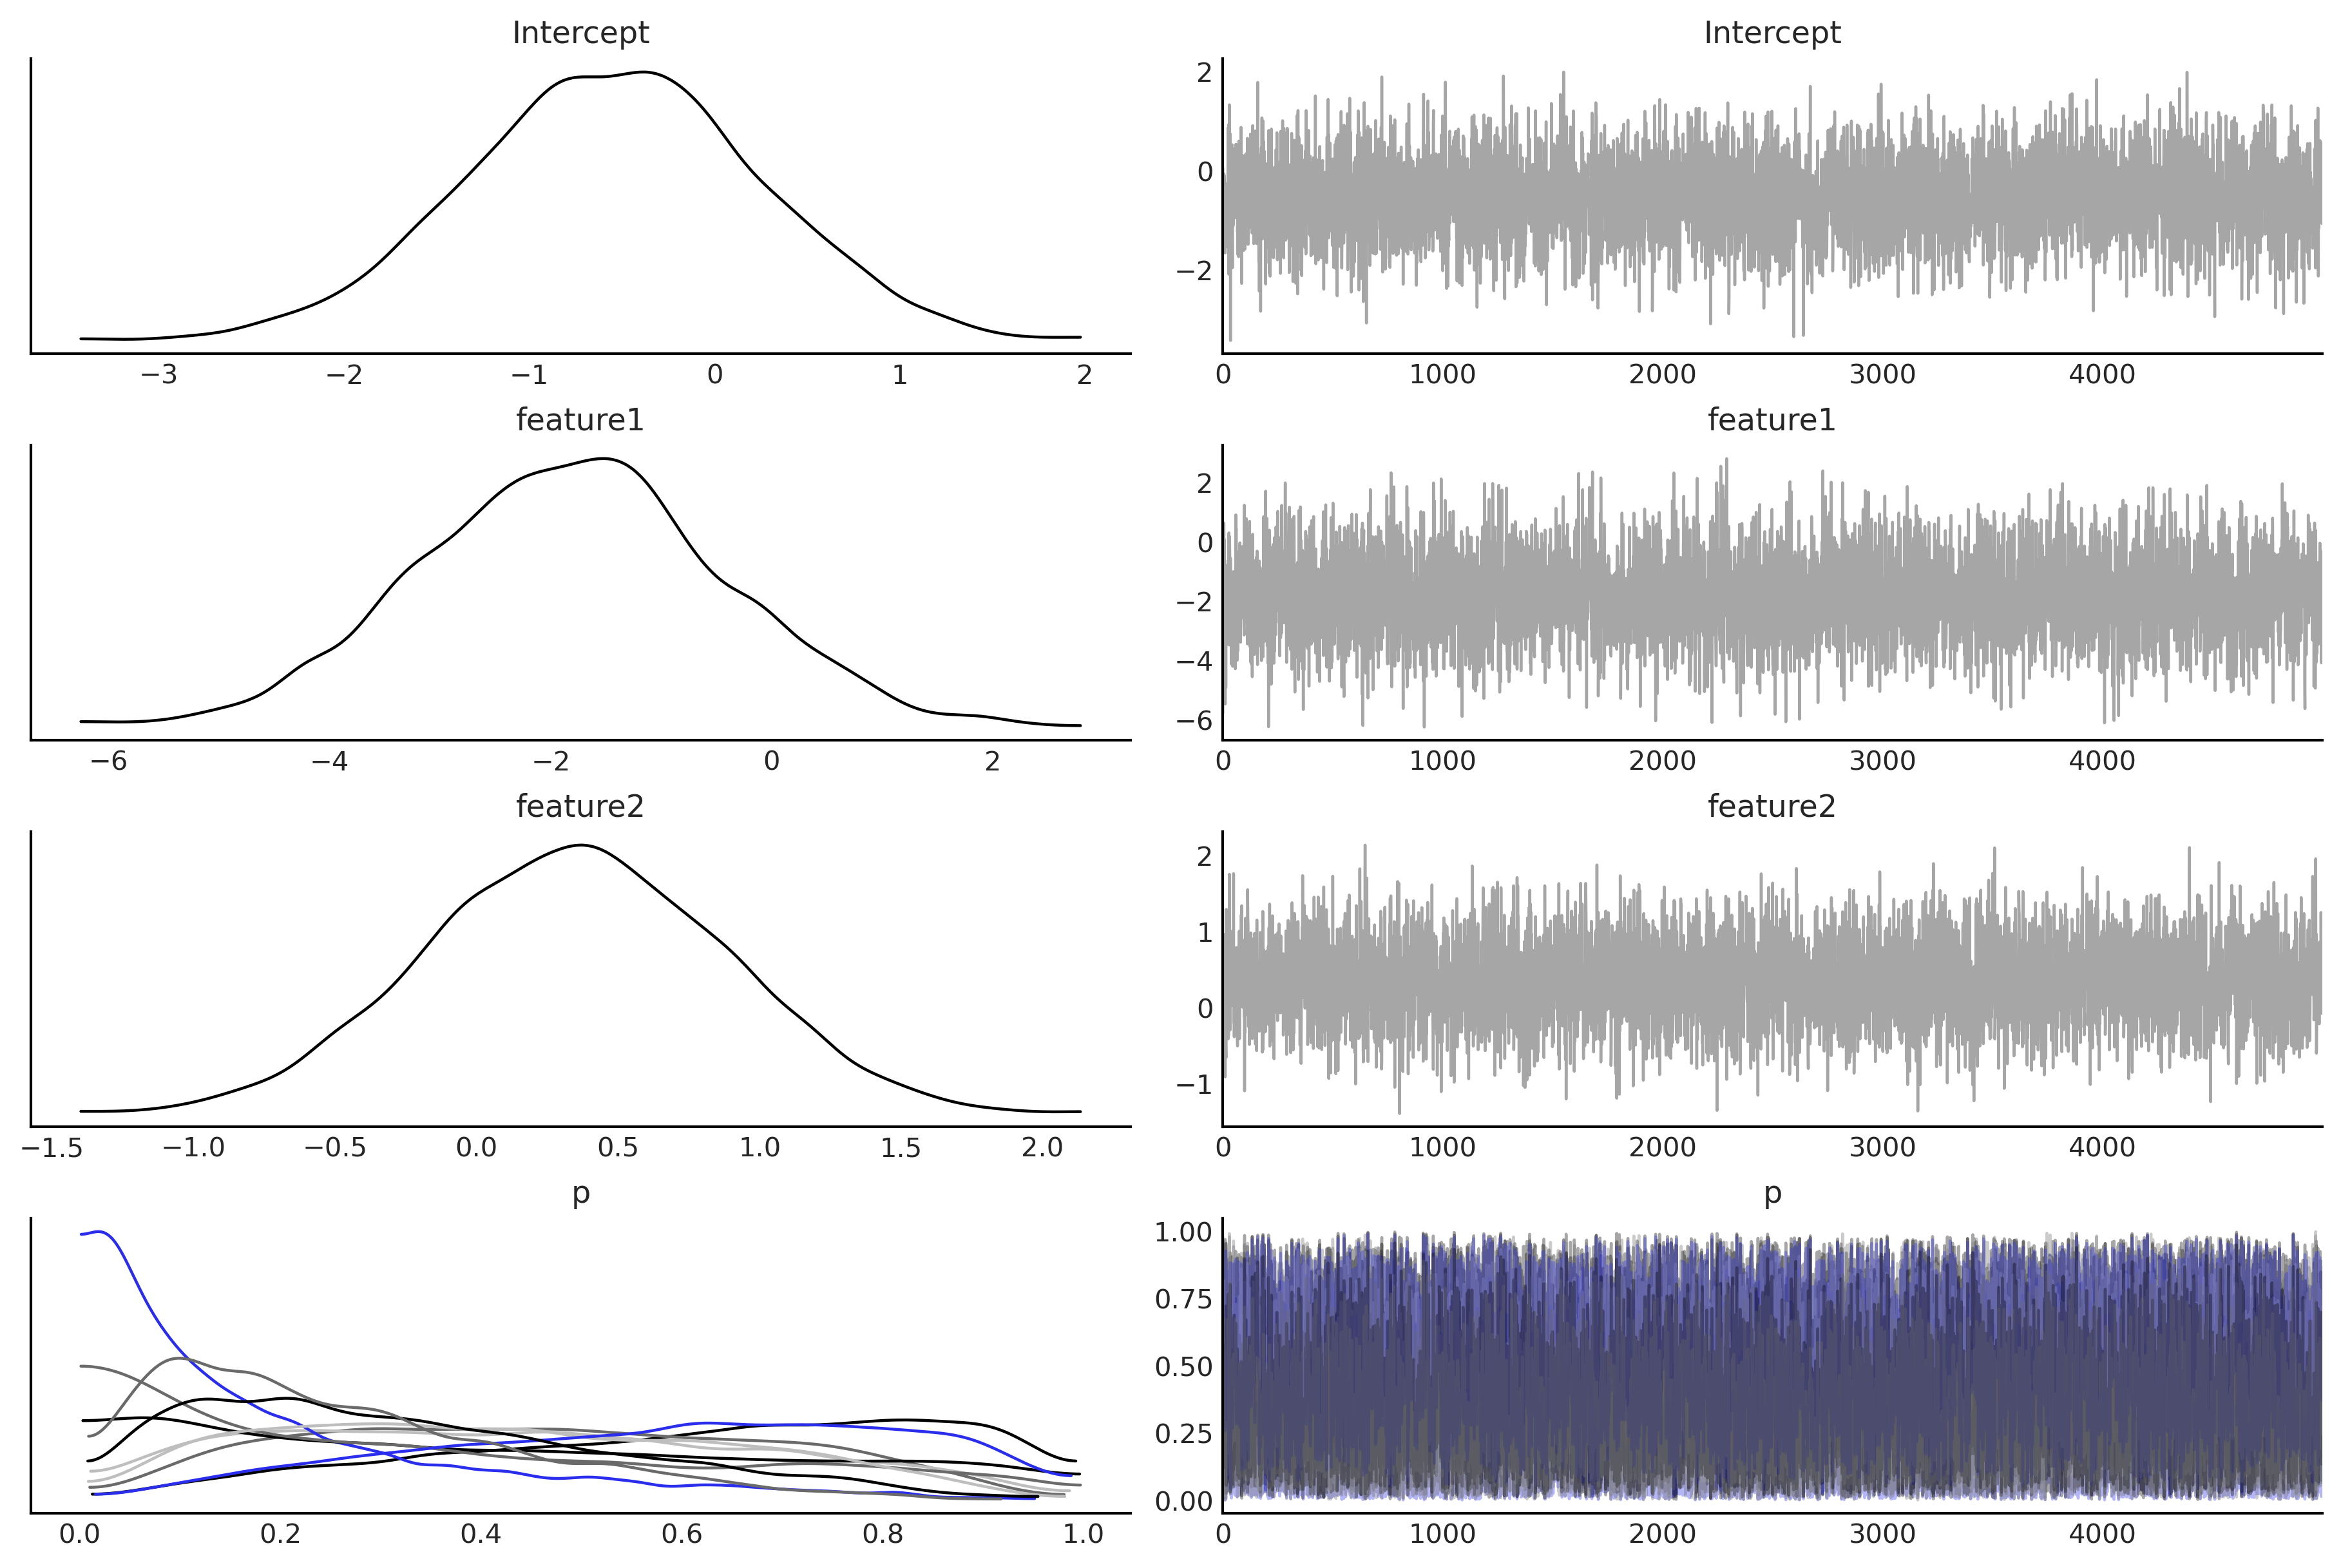

In [21]:
# Trace plot for flat model
az.plot_trace(posterior_samples)

# Posterior predictive checks
ppc = model.predict(posterior_samples)
az.plot_ppc(ppc)

## gfdgfdfdggfdfdg

In [17]:
# Sample from the approximate posterior
hierarchical_posterior_samples = fitted_hierarchical_model.sample(draws=5000)

In [16]:
trace=fitted_model.sample(5000)
trace

Inference data with groups:
	> posterior
	> observed_data

In [10]:
hierarchical_model = bmb.Model('didNotReturnNextFallIR ~ feature1 + feature2 + (1|SchoolCode)', df, family='bernoulli')
# Fit the model using variational inference
fitted_hierarchical_model = hierarchical_model.fit(method='vi', draws=2000)

Modeling the probability that didNotReturnNextFallIR==1


Output()

Finished [100%]: Average Loss = 12.083


In [11]:
posterior_summary = az.summary(fitted_model)
hierarchical_posterior_summary = az.summary(fitted_hierarchical_model)

print(posterior_summary)
print(hierarchical_posterior_summary)

ValueError: Can only convert xarray dataarray, xarray dataset, dict, pytree, netcdf filename, numpy array, pystan fit, emcee fit, pyro mcmc fit, numpyro mcmc fit, cmdstan fit csv filename, cmdstanpy fit to InferenceData, not MeanField

In [8]:
clinton_data = data.loc[data["vote"].isin(["clinton", "trump"]), :]
clinton_data.head()

,vote,age,party_id
0,clinton,56,democrat
1,trump,65,republican
2,clinton,80,democrat
3,trump,38,republican
4,trump,60,republican


In [9]:
clinton_model = bmb.Model("vote['clinton'] ~ party_id + age", clinton_data, family="bernoulli")
clinton_fitted = clinton_model.fit(draws=2000,
                                   #target_accept=0.85,
                                   random_seed=42,
                                   inference_method='vi'
                                   #idata_kwargs={"log_likelihood": True}
)

Modeling the probability that vote==clinton


Output()

Finished [100%]: Average Loss = 248.17


In [34]:
clinton_model

       Formula: vote['clinton'] ~ party_id + age
        Family: bernoulli
          Link: p = logit
  Observations: 373
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 7.8805)
            party_id ~ Normal(mu: [0. 0.], sigma: [5.4007 6.0634])
            age ~ Normal(mu: 0.0, sigma: 0.1454)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

Sampling: [Intercept, age, party_id]


array([<Axes: title={'center': 'Intercept'}>,
       <Axes: title={'center': 'party_id\nindependent'}>,
       <Axes: title={'center': 'party_id\nrepublican'}>,
       <Axes: title={'center': 'age'}>], dtype=object)

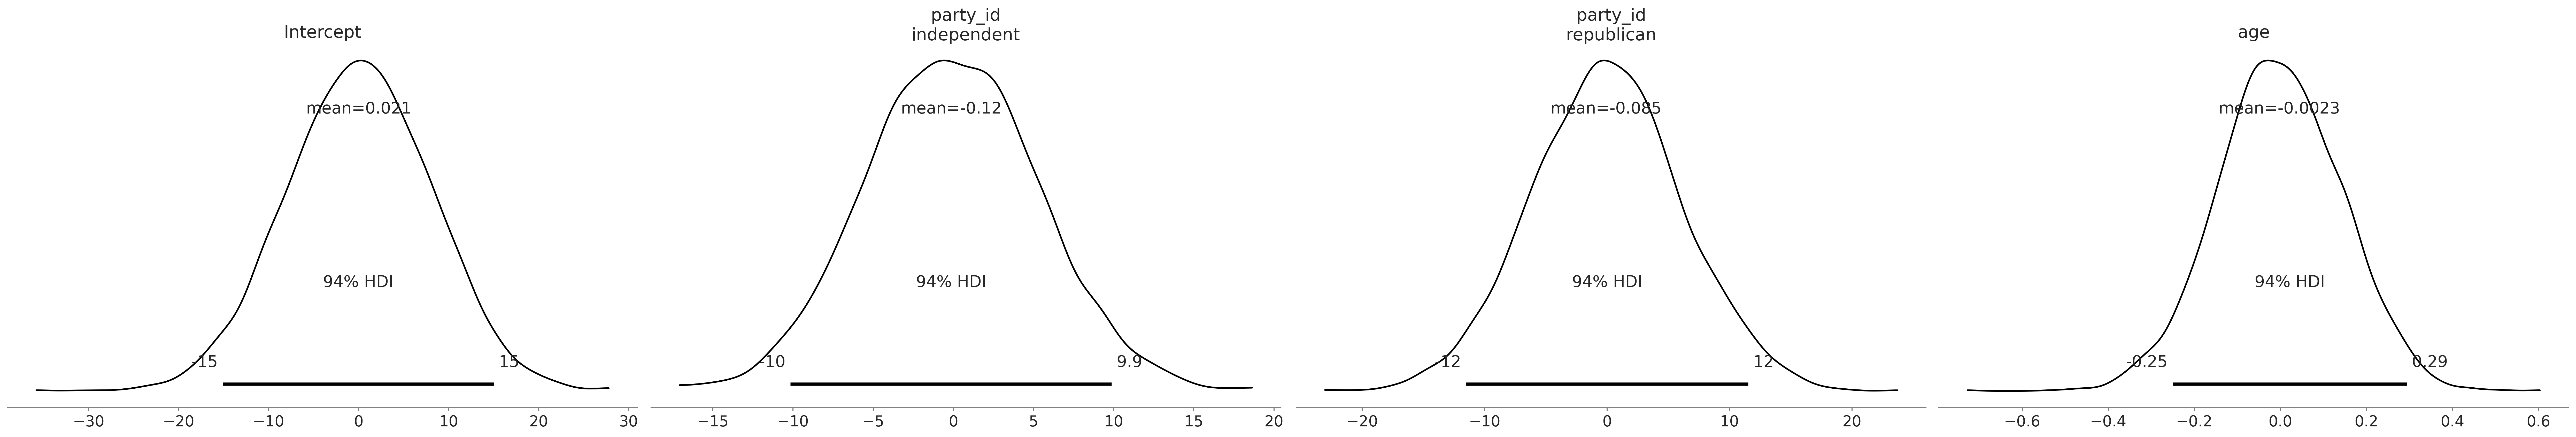

In [35]:
clinton_model.plot_priors()

In [39]:
import bambi as bmb
import arviz as az
import pandas as pd

# Sample DataFrame
data = {
    'didNotReturnNextFallIR': [0, 1, 0, 1, 0],
    'Age': [18, 19, 20, 18, 21],
    'GPA': [3.5, 2.8, 3.2, 3.0, 3.6],
    'HasScholarship': [1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

# Treating as Numeric
model_numeric = bmb.Model('didNotReturnNextFallIR ~ Age + GPA + HasScholarship', df, family='bernoulli')
results_numeric = model_numeric.fit(inference_method='vi')

Modeling the probability that didNotReturnNextFallIR==1


Output()

Finished [100%]: Average Loss = 6.6124


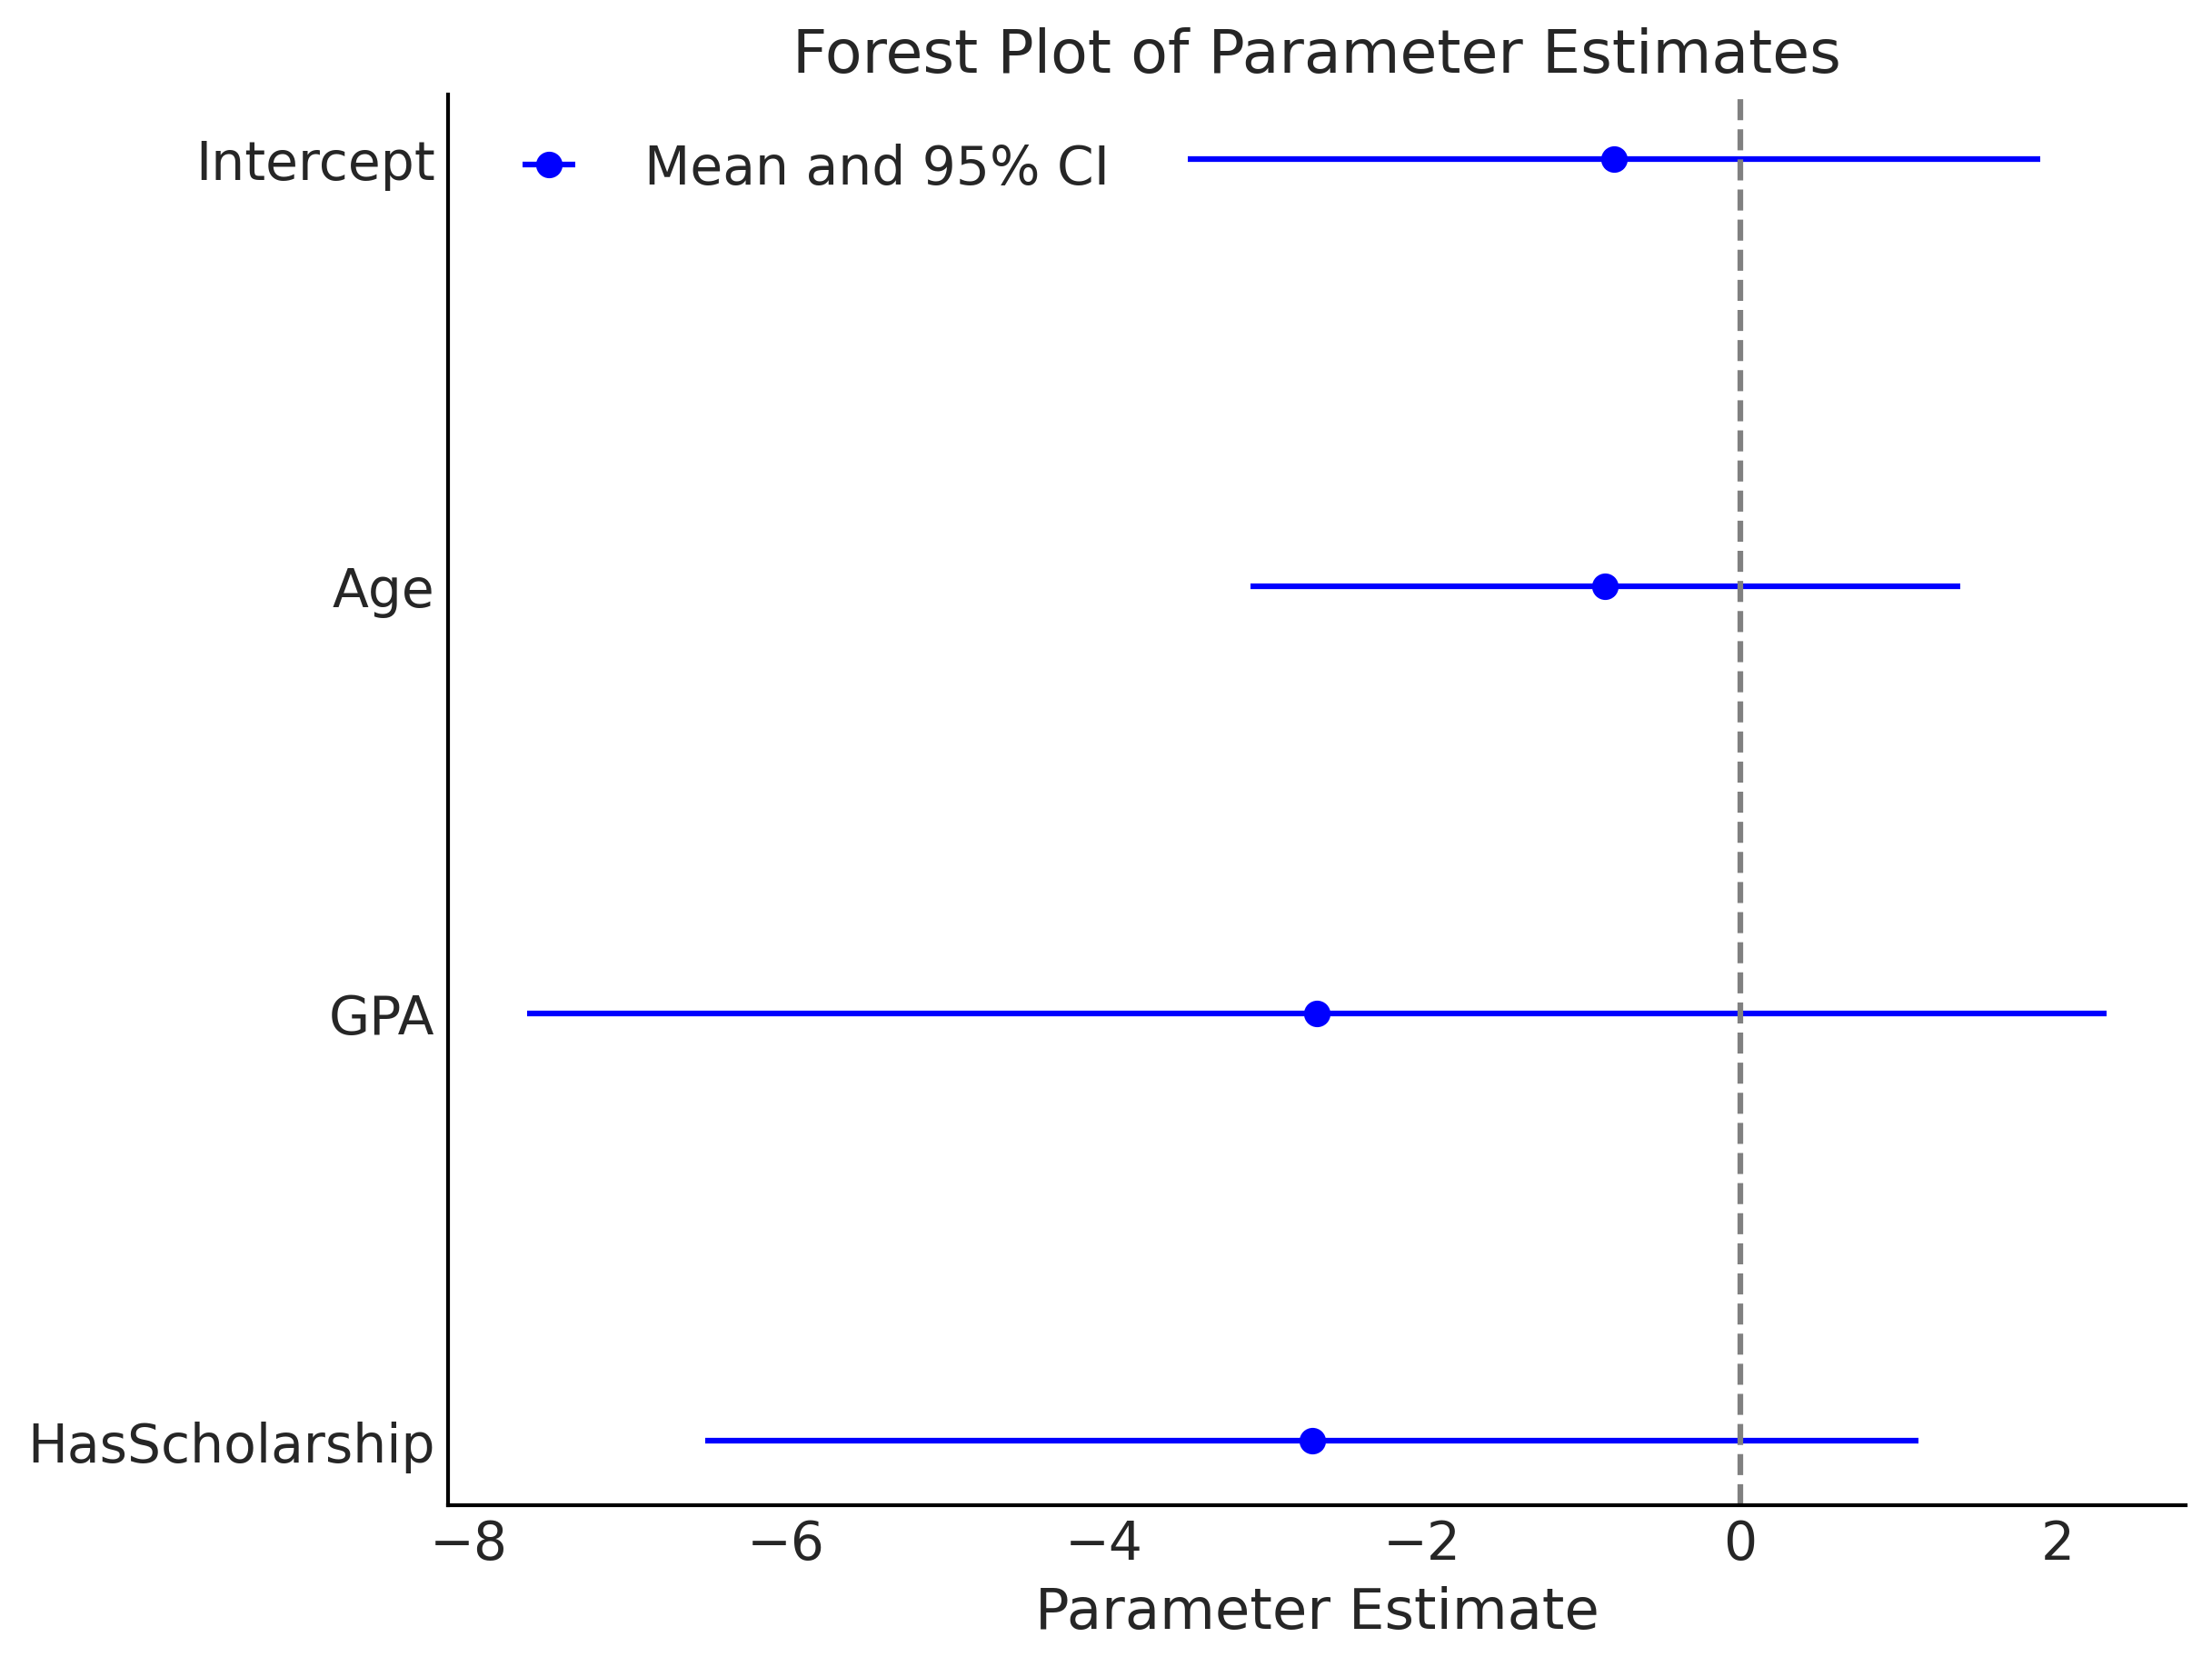

In [49]:

# Extracting mean and standard deviation of the variational parameters
means = results_numeric.mean.eval()
stds = results_numeric.std.eval()

# Define parameter names (assuming they match the order of means/stds)
param_names = ['Intercept', 'Age', 'GPA', 'HasScholarship']

# Calculate the 95% credible intervals
lower_bound = means - 1.96 * stds  # Lower bound of the 95% credible interval
upper_bound = means + 1.96 * stds  # Upper bound of the 95% credible interval

# Plot forest plot manually
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each parameter with its credible interval
for i, param in enumerate(param_names):
    ax.errorbar(means[i], i, xerr=[[means[i] - lower_bound[i]], [upper_bound[i] - means[i]]], fmt='o', color='blue', label='Mean and 95% CI' if i == 0 else "")

ax.set_yticks(np.arange(len(param_names)))
ax.set_yticklabels(param_names)
ax.invert_yaxis()  # Reverse the order for better visualization
ax.set_xlabel('Parameter Estimate')
ax.set_title('Forest Plot of Parameter Estimates')
ax.axvline(0, color='grey', linestyle='--')

plt.legend()
plt.show()


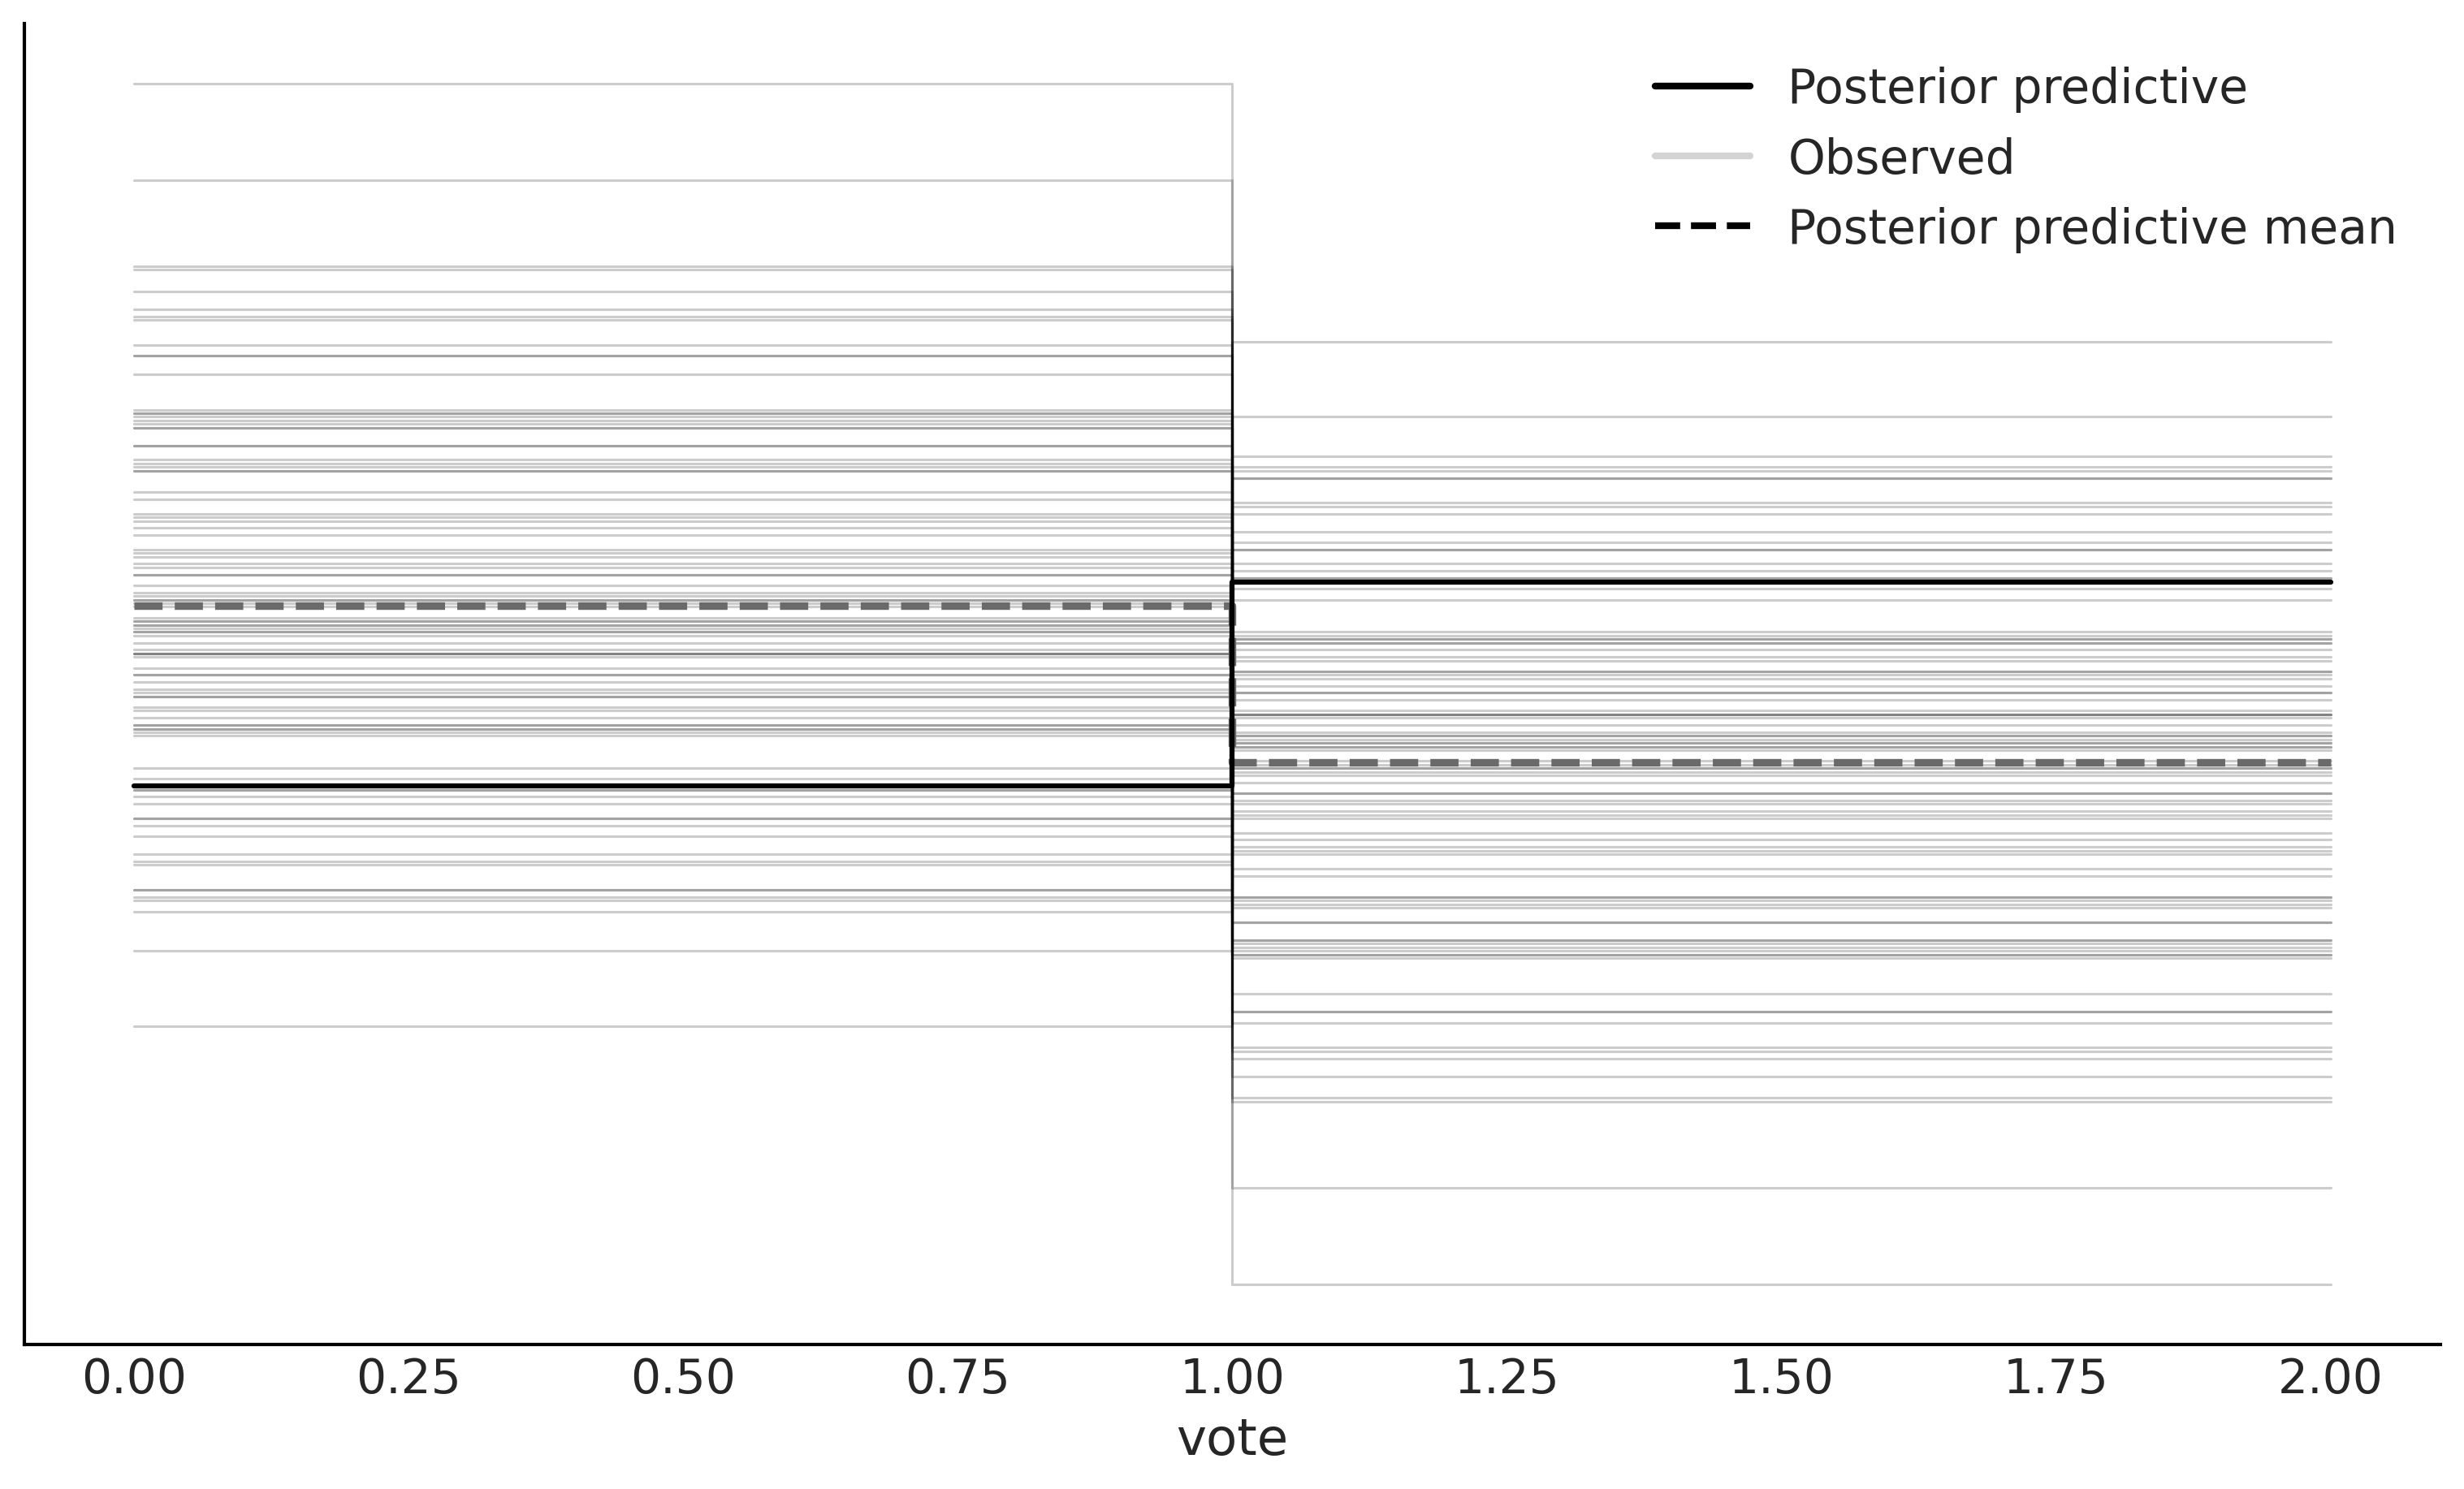

In [70]:
import arviz as az
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Reduce the number of posterior predictive samples for plotting
reduced_posterior_predictive = posterior_predictive.sel(draw=slice(0, 100))

# Plot posterior predictive check with reduced samples
fig, ax = plt.subplots(figsize=(10, 6))
az.plot_ppc(reduced_posterior_predictive, ax=ax)

# Customize legend
legend_elements = [
    Line2D([0], [0], color='black', lw=2, label='Posterior predictive'),
    Line2D([0], [0], color='lightgray', lw=2, label='Observed'),
    Line2D([0], [0], color='black', lw=2, linestyle='--', label='Posterior predictive mean')
]

ax.legend(handles=legend_elements, loc='upper right')
plt.show()



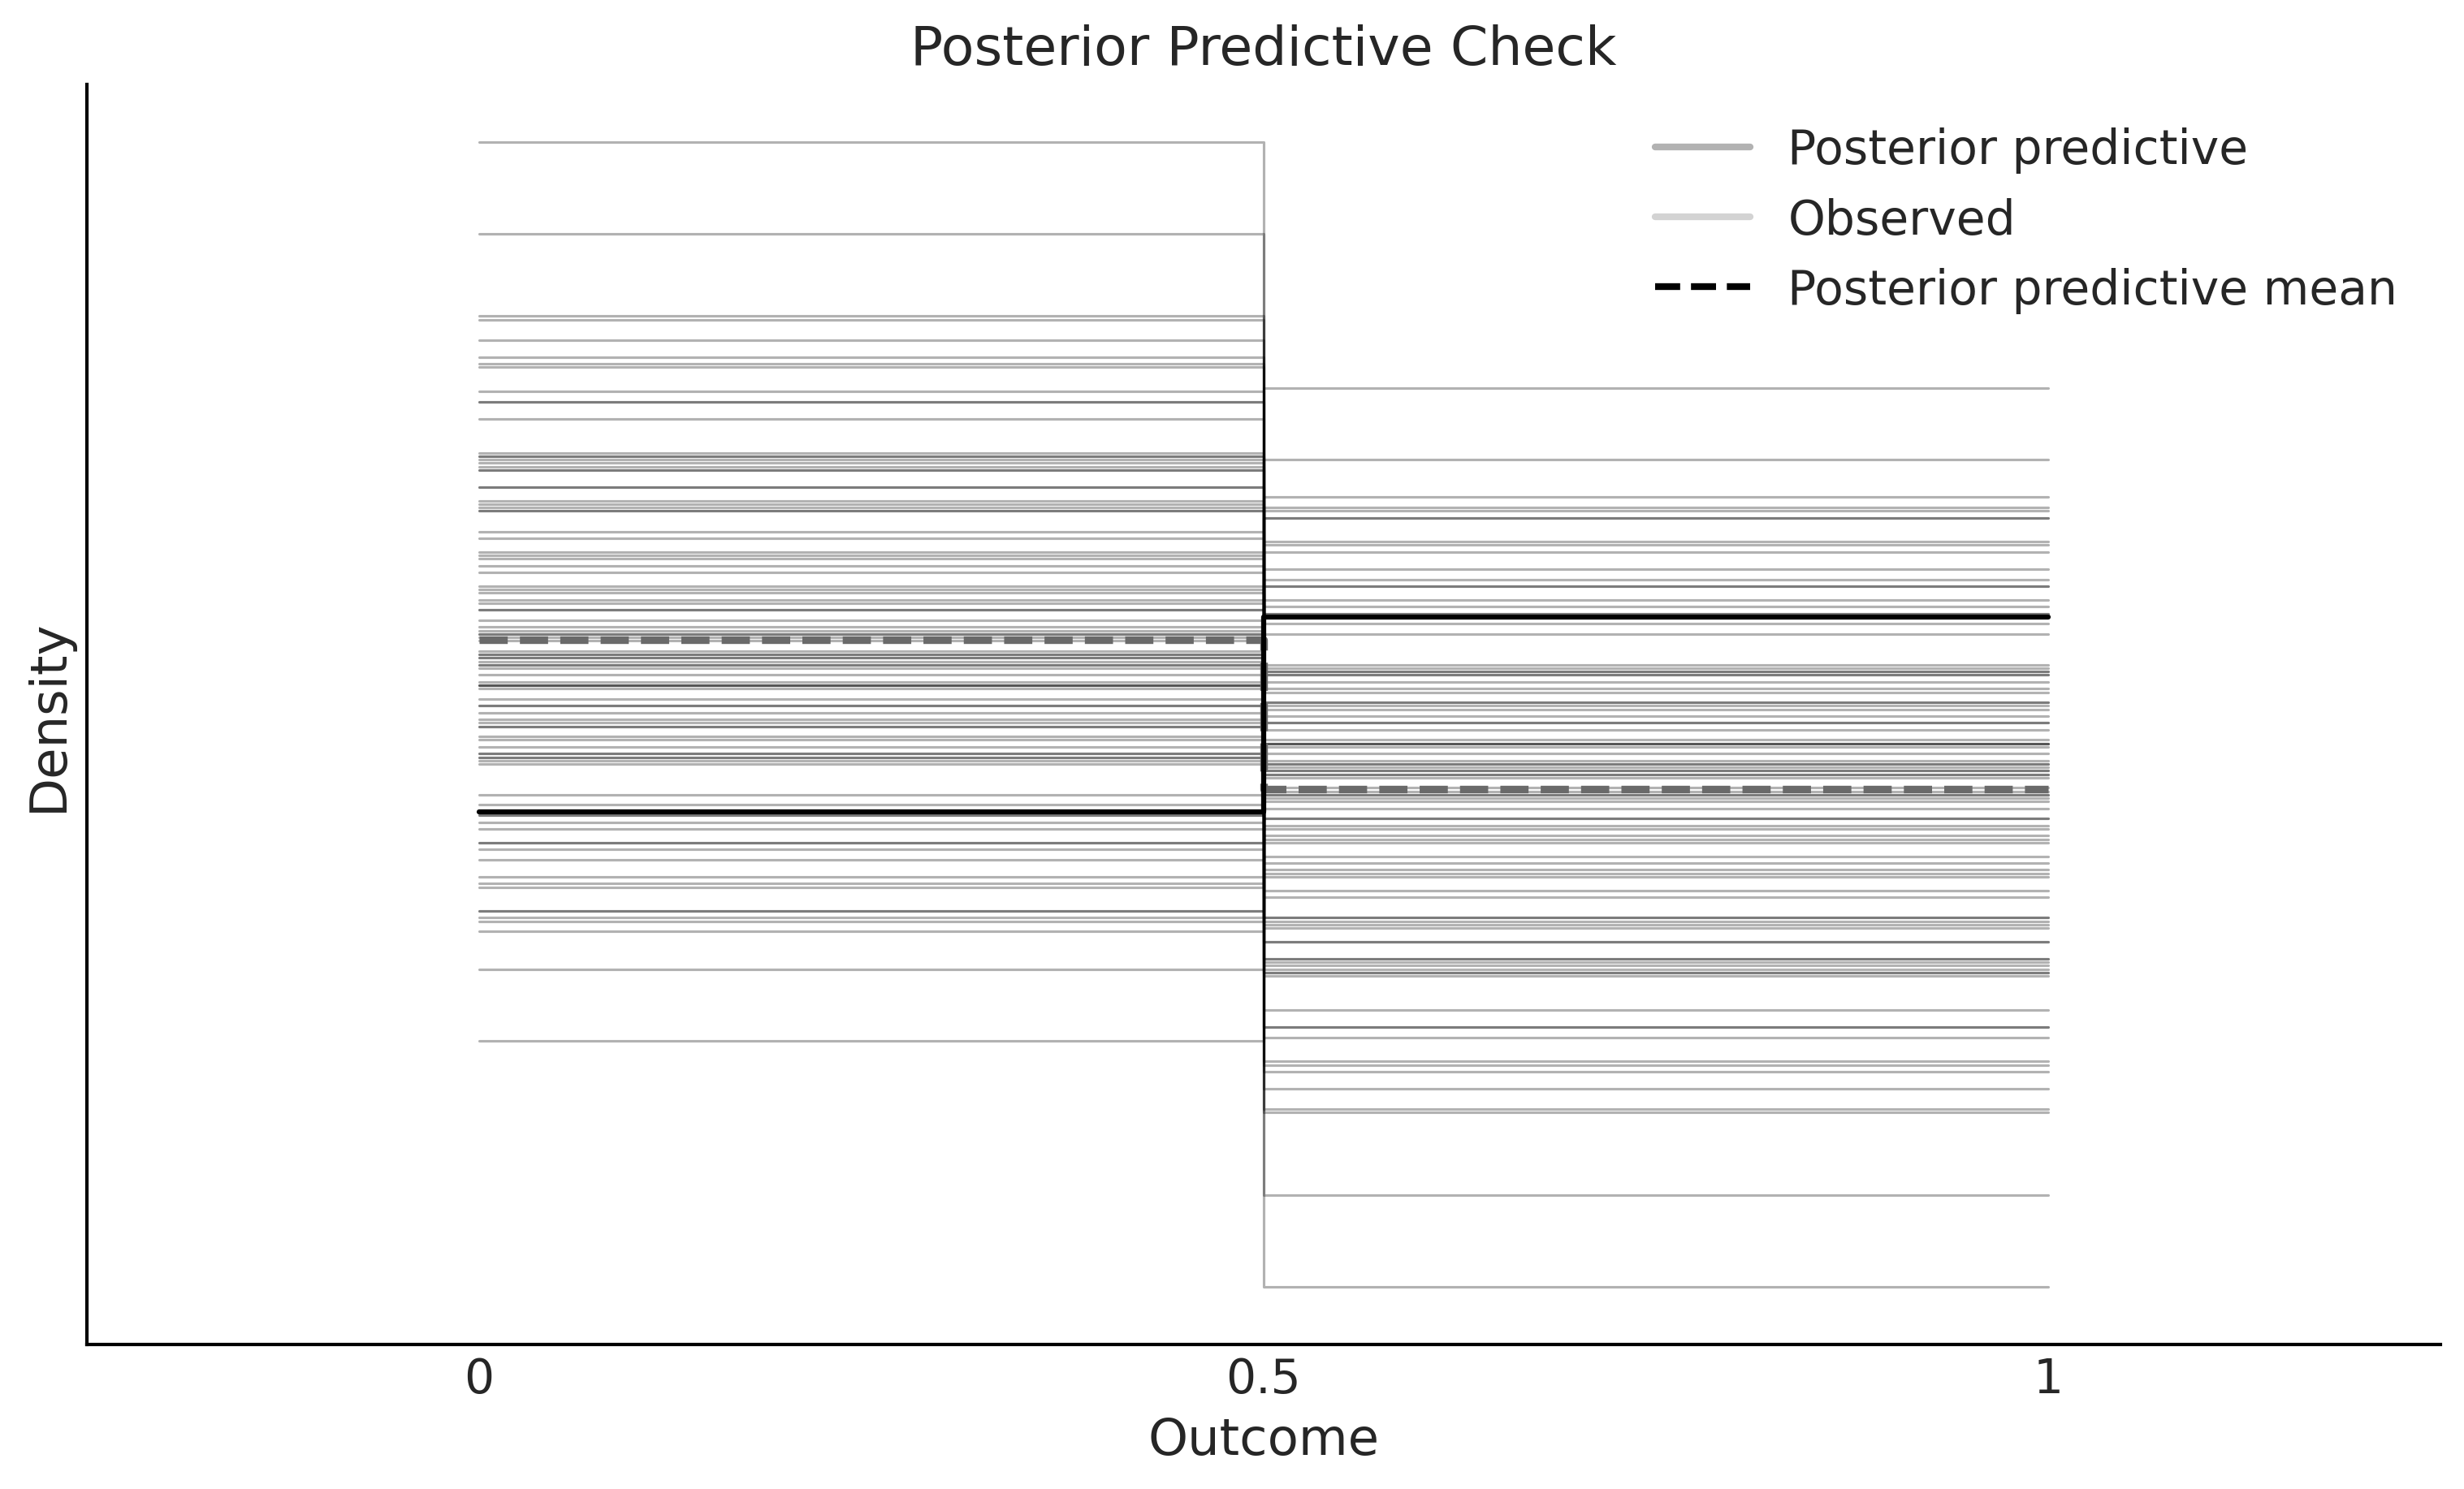

In [74]:
import arviz as az
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Reduce the number of posterior predictive samples for plotting
reduced_posterior_predictive = posterior_predictive.sel(draw=slice(0, 100))

# Plot posterior predictive check with reduced samples
fig, ax = plt.subplots(figsize=(10, 6))
az.plot_ppc(reduced_posterior_predictive, ax=ax, alpha=0.3)

# Customize legend
legend_elements = [
    Line2D([0], [0], color='black', lw=2, alpha=0.3, label='Posterior predictive'),
    Line2D([0], [0], color='lightgray', lw=2, label='Observed'),
    Line2D([0], [0], color='black', lw=2, linestyle='--', label='Posterior predictive mean')
]

ax.legend(handles=legend_elements, loc='upper right')
ax.set_title("Posterior Predictive Check")
ax.set_xlabel("Outcome")
ax.set_ylabel("Density")

# Adjust x-axis to focus on binary outcomes
ax.set_xlim(-0.5, 2.5)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['0', '0.5', '1'])

plt.show()


In [84]:
import arviz as az
import pandas as pd

# Get the summary statistics for the posterior
summary = az.summary(reduced_posterior_predictive.posterior)

# Filter the summary to focus on the main coefficients (e.g., Age, Republican, Independent)
coefficients_of_interest = summary.loc[summary.index.str.contains('Age|Republican|Independent')]

# Extract means and credible intervals for these coefficients
means = coefficients_of_interest['mean']
lower_bound = coefficients_of_interest['hdi_3%']
upper_bound = coefficients_of_interest['hdi_97%']

# Display the credible intervals as text
credible_intervals = pd.DataFrame({
    'Coefficient': means.index,
    'Mean': means.values,
    'Lower Bound (3%)': lower_bound.values,
    'Upper Bound (97%)': upper_bound.values
})

print(credible_intervals)


AttributeError: 'InferenceData' object has no attribute 'posterior'

In [47]:
dir(results_numeric)

['_Group__name_registry',
 '_Group__param_registry',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_group__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__param_spec__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_check_user_params',
 '_finalize_init',
 '_group_class',
 '_initial_type',
 '_input_type',
 '_new_initial',
 '_new_initial_shape',
 '_prepare_start',
 '_scale_cost_to_minibatch',
 '_single_symbolic_varlogp_and_datalogp',
 '_sized_symbolic_varlogp_and_datalogp',
 '_user_params',
 '_vfam',
 'alias_names',
 'all_histograms',
 'any_histograms',
 'collect',
 'cov',
 'create_shared_params',
 'datalogp',
 'datalogp_norm',
 'ddim',
 'get_optimization_replaceme

In [48]:
type(results_numeric)

pymc.variational.approximations.MeanField